<a href="https://colab.research.google.com/github/Hbasgol/qlearning/blob/master/qlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Python libraries

import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
from gym.wrappers.monitoring import video_recorder
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay
import gym
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib.animation

In [0]:
!pip install pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!mkdir videos

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

def show_video():
  mp4list = glob.glob('videos/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def make_video(env, trialNo = 0):
  video_render = video_recorder.VideoRecorder(env, './videos/trial.mp4')
  return video_render

mkdir: cannot create directory ‘videos’: File exists


Episode 0, score 13: Trying to step environment which is currently done.


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


• VIDEO: Episode: 0, Score mean for the episode: 13.0 •


Episode 50, score 28: Trying to step environment which is currently done.
Episode 100, score 146: Trying to step environment which is currently done.


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


• VIDEO: Episode: 100, Score mean for the episode: 48.09 •


Episode 150, score 127: Trying to step environment which is currently done.
Episode 200, score 201: Trying to step environment which is currently done.


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


• VIDEO: Episode: 200, Score mean for the episode: 160.51 •


Episode 250, score 201: Trying to step environment which is currently done.
Episode 300, score 201: Trying to step environment which is currently done.


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


• VIDEO: Episode: 300, Score mean for the episode: 201.0 •


◙ Played 300 episodes. Solved after total 40973 trials ◙
Episode 300
current mean: 201.0
current reward: 1957.0
Scores of the agent: [13, 14, 28, 46, 16, 34, 12, 16, 14, 23, 14, 16, 11, 17, 36, 27, 14, 14, 37, 30, 15, 34, 24, 16, 17, 18, 13, 9, 21, 29, 23, 24, 19, 10, 90, 24, 33, 69, 19, 16, 62, 12, 28, 28, 32, 13, 13, 16, 28, 22, 28, 26, 13, 12, 35, 45, 73, 49, 75, 56, 72, 52, 84, 45, 21, 115, 94, 84, 47, 79, 59, 87, 50, 31, 42, 117, 72, 66, 39, 24, 61, 38, 69, 147, 58, 178, 73, 106, 151, 125, 83, 14, 131, 122, 119, 27, 23, 58, 178, 14, 146, 113, 60, 42, 170, 52, 66, 24, 183, 40, 117, 77, 201, 122, 201, 158, 188, 201, 36, 69, 31, 183, 201, 89, 106, 116, 104, 174, 120, 126, 104, 134, 191, 20, 201, 50, 118, 169, 143, 160, 115, 201, 154, 121, 114, 201, 201, 111, 161, 180, 127, 201, 142, 201, 148, 150, 106, 182, 201, 133, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201, 201,

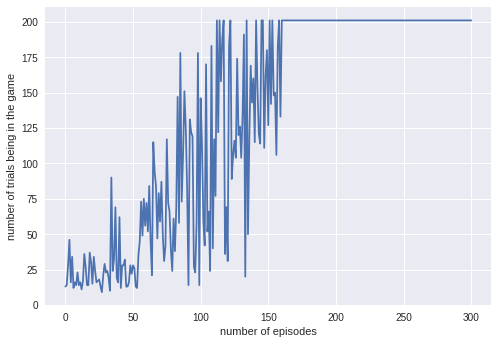

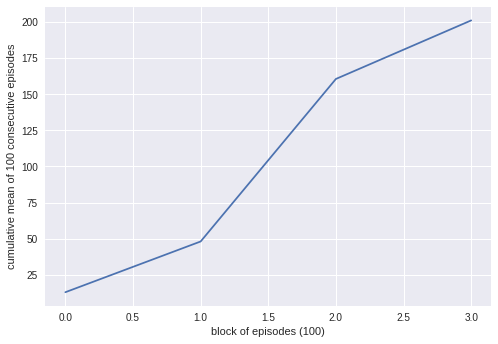

In [0]:
# class defined for the the agent playing the game.

class Agent():
  def __init__(self, Environment, alpha=0.1, epsilon=0.1, gamma=1):
    self.alpha=alpha
    self.epsilon= epsilon
    self.gamma=gamma
    self.env=Environment.env
    self.buckets=Environment.buckets
    self.Q_table=np.zeros(self.buckets + (self.env.action_space.n,))
    self.scores=[]
    self.reward=[]

  def take_action(self, state, epsilon):
    if np.random.random() <= epsilon: #epsilon: greedy search parameter
      return self.env.action_space.sample() #returns a random action
    else:
      return np.argmax(self.Q_table[state]) #returns the action that has higher Q value
    
  def update_environment(self, Environment):
    self.env=Environment.env
    
  def update_q_table(self, old_state, action, reward, new_state, alpha):
    self.Q_table[old_state][action]+=alpha*(reward + self.gamma*np.max(self.Q_table[new_state])-self.Q_table[old_state][action])
     
  def decayingepsilon(self, t):
    return max(self.epsilon, min(1, 1.0 - math.log10((t + 1) / 25)))
 
  def decayingalpha(self, t):
    return max(self.alpha, min(1, 1.0 - math.log10((t + 1) / 25)))

# class defined for the environment that is being played on.
class Environment():
  def __init__(self, buckets=(1, 1, 8, 12)):
    self.buckets=buckets
    self.env = gym.make('CartPole-v0')
  
  def stateDiscretization(self, obs):
    # -> x, x_dot, theta, theta_dot
    upper_bounds = [self.env.observation_space.high[0], 0.5, self.env.observation_space.high[2], math.radians(50)]
    lower_bounds = [self.env.observation_space.low[0], -0.5, self.env.observation_space.low[2], -math.radians(50)]
    ratios = [(obs[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(obs))]
    new_obs = [int(round((self.buckets[i] - 1) * ratios[i])) for i in range(len(obs))]
    new_obs = [min(self.buckets[i] - 1, max(0, new_obs[i])) for i in range(len(obs))]
    return tuple(new_obs)

class Rules():
  def __init__(self, episodes, winning_condition, steps):
    self.episodes=episodes
    self.winning_condition=winning_condition # normally the agent should reach 195 for 100 consecutive trials
    self.steps=steps # number of trials for each episode (should be more than 2000)
    
def Game(Agent, Environment, Rules):
  meanlist= []
  scores=[]
  done=False
  message=True
    
  for i in range(Rules.episodes):
      
    current_state = Environment.stateDiscretization(Environment.env.reset())
    epsilon = Agent.decayingepsilon(i)
    alpha = Agent.decayingalpha(i)
    
    video = make_video(Environment.env, i)
    Agent.update_environment(Environment)
    
    cumulative_reward=0
    k=0
    done_k=0
    
    while k <= Rules.steps:
      k += 1
      if i%100==0:
        video.capture_frame()
      
      action = Agent.take_action(current_state, epsilon)
      
      if done == True and message == True: # controlling done message
        if i%50==0:
          print("Episode {}, score {}: Trying to step environment which is currently done.".format(i, k))
        done_k = k
        message=False
        
      observation, reward, done, info = Environment.env.step(action)
      vertical = (Environment.env.observation_space.high[2] + abs(Environment.env.observation_space.low[2]))/4
      
      if abs(observation[2])>vertical:
        reward=-5

      new_state = Environment.stateDiscretization(observation)
      Agent.update_environment(Environment)
      Agent.update_q_table(current_state, action, reward, new_state, alpha)
      current_state = new_state
      cumulative_reward+=reward
    
    message=True
    done=False
    
    Agent.scores.append(done_k) # the number of steps that the agent were in the game (done_k)
    scores.append(done_k)
    mean=np.mean(scores) # caution, total trial is fixed to 2000. 
    Agent.reward.append(cumulative_reward)
    
    if i%100==0:
      print("• VIDEO: Episode: {}, Score mean for the episode: {} •".format(i, mean))
      meanlist.append(mean)
      scores=[]
      video.close()
      Environment.env.close()
      show_video()
      
      if mean>=Rules.winning_condition:
        print('◙ Played {} episodes. Solved after total {} trials ◙'.format(i, sum(Agent.scores)))
        print("Episode {}".format(i))
        print("current mean:", mean)
        print("current reward:", cumulative_reward)
        break
  
  return Environment, Agent, meanlist, scores
       
Environment = Environment()
Agent = Agent(Environment)
Rules = Rules(400, 195, 2000)
               
Environment, Agent, meanlist, scores = Game(Agent, Environment, Rules)

print("Scores of the agent:", Agent.scores)
print("Mean of blocks (100 episodes)", meanlist)

plt.plot(range(0, len(Agent.scores)), Agent.scores)
plt.xlabel("number of episodes")
plt.ylabel("number of trials being in the game") 
plt.show()

plt.plot(range(0, len(meanlist)), meanlist)
plt.xlabel("block of episodes (100)")
plt.ylabel("cumulative mean of 100 consecutive episodes")
plt.show()
